# **Data Loading**

In [1]:
import pandas as pd

# Define file paths
train_file_path = '/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv'
test_file_path = '/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv'

try:
    # Load the training and testing datasets
    train_data = pd.read_csv(train_file_path)
    test_data = pd.read_csv(test_file_path)

    # Display basic information about the datasets
    print("Training Data Loaded Successfully!")
    print("Training Data Shape:", train_data.shape)
    
    print("\nTesting Data Loaded Successfully!")
    print("Testing Data Shape:", test_data.shape)
    
except Exception as e:
    print(f"An error occurred while loading the data: {e}")


Training Data Loaded Successfully!
Training Data Shape: (60000, 171)

Testing Data Loaded Successfully!
Testing Data Shape: (16000, 171)


In [2]:
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
test_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


# Data Preprocessing and Exploration

# Data cleaning

**Handle missing values and Class binary value replace with 0 and 1** 

In [4]:
import numpy as np

print("\nData Cleaning Started!")
print("Training Data Shape before Cleaning:", train_data.shape)
print("Testing Data Shape before Cleaning:", test_data.shape)




Data Cleaning Started!
Training Data Shape before Cleaning: (60000, 171)
Testing Data Shape before Cleaning: (16000, 171)


In [5]:

# Replace 'na' with np.NaN
train_data.replace('na', np.NaN, inplace=True)
test_data.replace('na', np.NaN, inplace=True)


In [6]:
# Replace 'neg' with 0 and 'pos' with 1
train_data.replace({'neg': 0, 'pos': 1}, inplace=True)
test_data.replace({'neg': 0, 'pos': 1}, inplace=True)

/tmp/ipykernel_86/1992235615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({'neg': 0, 'pos': 1}, inplace=True)
/tmp/ipykernel_86/1992235615.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'neg': 0, 'pos': 1}, inplace=True)


**Remove duplicates and removing null colums**

In [7]:
# Convert all columns to appropriate data types (e.g., numeric where possible)
train_data = train_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.apply(pd.to_numeric, errors='coerce')

# Display the number of missing values in each dataset
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())




Missing Values in Training Data:
class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

Missing Values in Testing Data:
class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
          ...  
ee_007      192
ee_008      192
ee_009      192
ef_000      762
eg_000      762
Length: 171, dtype: int64


In [8]:
# Optionally, drop columns or rows with too many missing values
train_data.dropna(axis=1, thresh=0.75 * len(train_data), inplace=True)  # Drop columns with >30% missing values
test_data.dropna(axis=1, thresh=0.75 * len(test_data), inplace=True)

# Fill remaining missing values with column mean (for simplicity)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

print("\nData Cleaning Completed!")
print("Training Data Shape after Cleaning:", train_data.shape)
print("Testing Data Shape after Cleaning:", test_data.shape)


Data Cleaning Completed!
Training Data Shape after Cleaning: (60000, 161)
Testing Data Shape after Cleaning: (16000, 161)


In [9]:
# Sample a subset of training data to reduce training time
print(train_data.shape)

(60000, 161)


In [10]:
# Remove Duplicates
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

train_data.shape, test_data.shape

((59997, 161), (16000, 161))

In [11]:
train_data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [12]:
test_data.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814,156.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


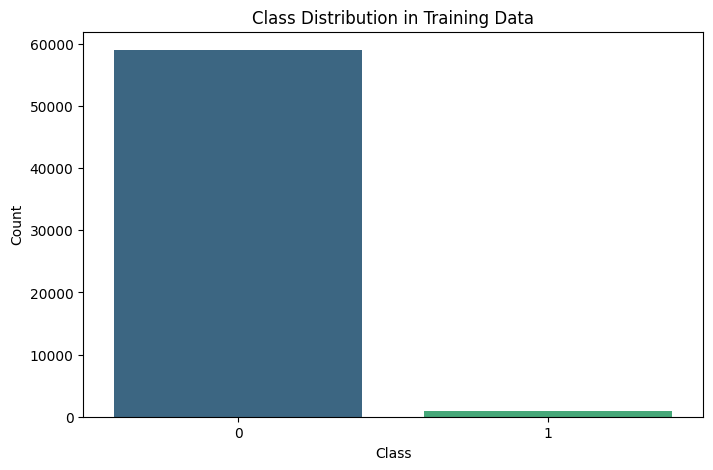

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare training features and target
X_train = train_data.drop('class', axis=1)  # Features
y_train = train_data['class']

# Prepare testing features and target
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

# Visualize Class Imbalance Training Data
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# # Visualize Class Imbalance Testing Data
# plt.figure(figsize=(8, 5))
# sns.countplot(x=y_test, palette='viridis')
# plt.title('Class Distribution in Testing Data')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.show()

# **Feature Engineering**

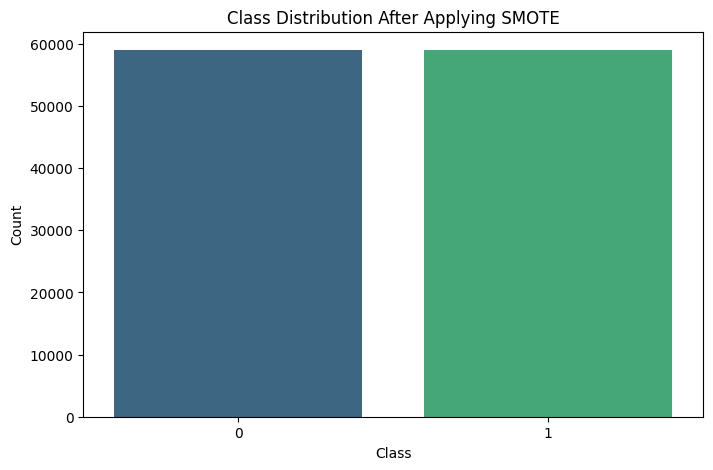

In [14]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Address Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize Class Distribution After SMOTE On training data
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


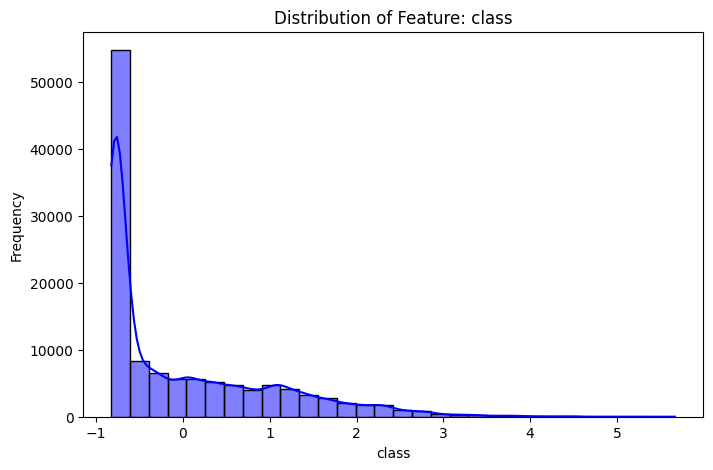

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


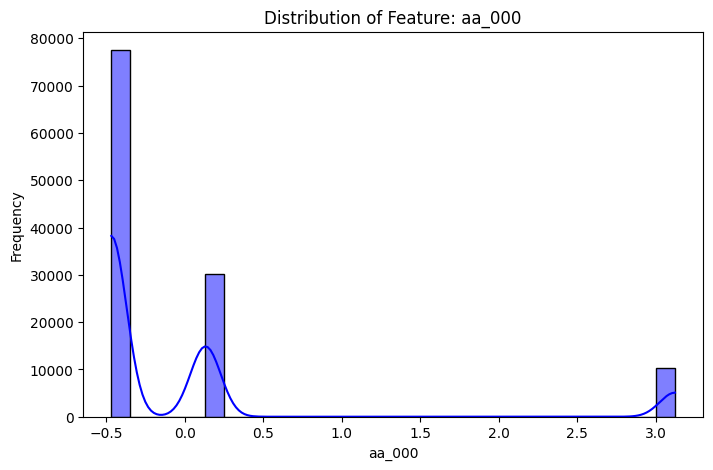

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


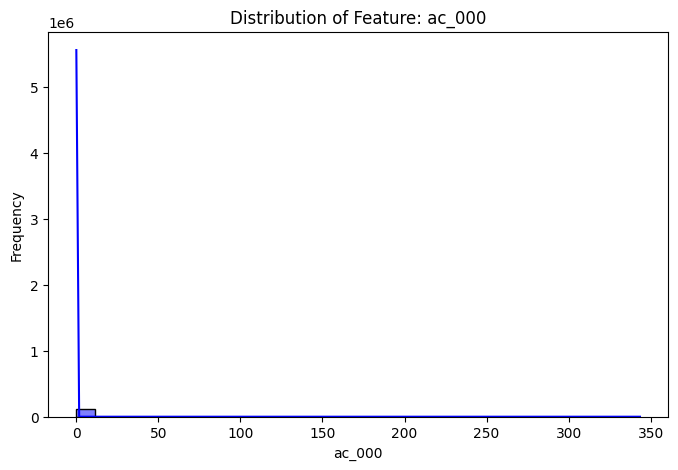

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


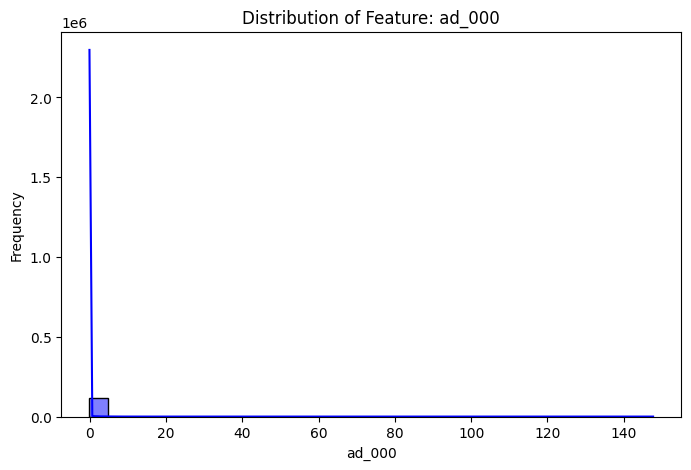

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


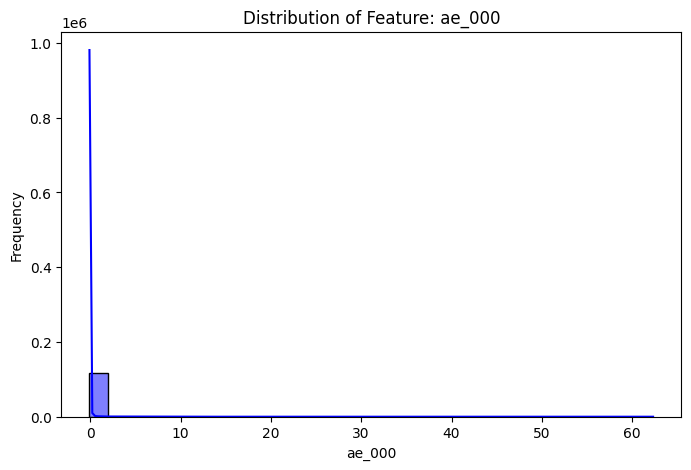

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


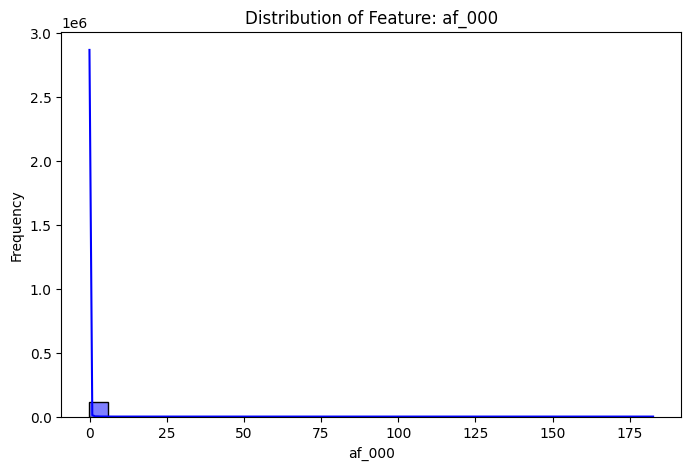

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


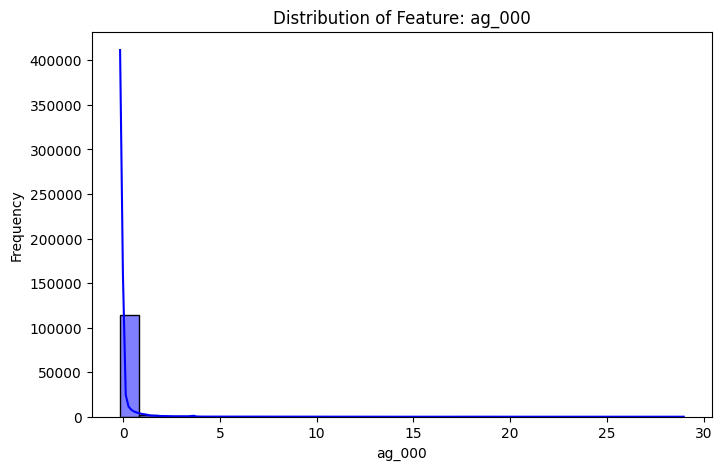

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


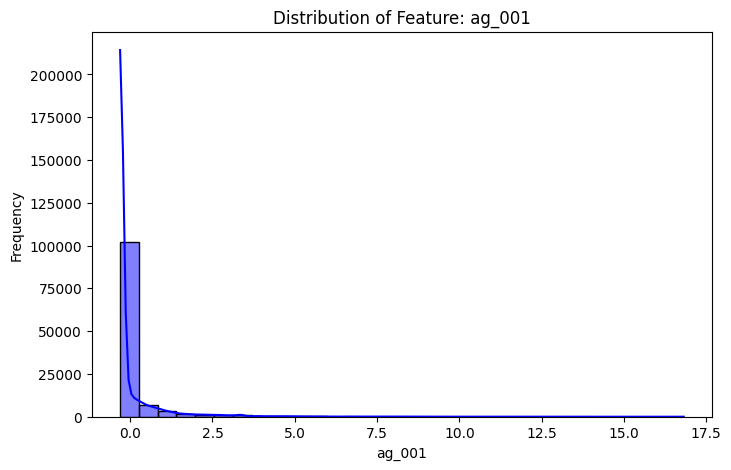

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


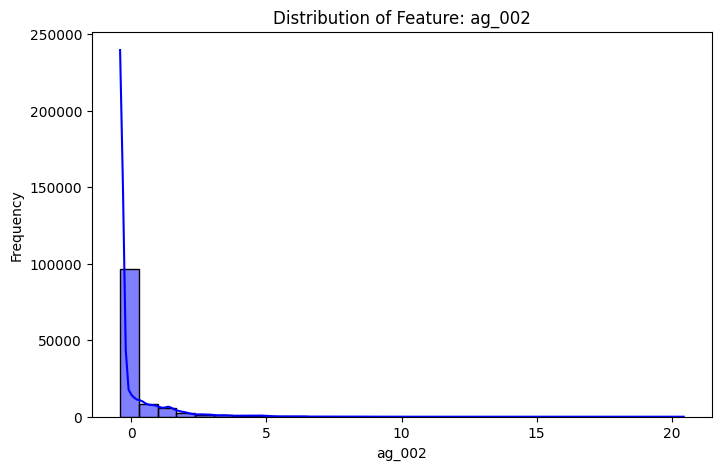

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


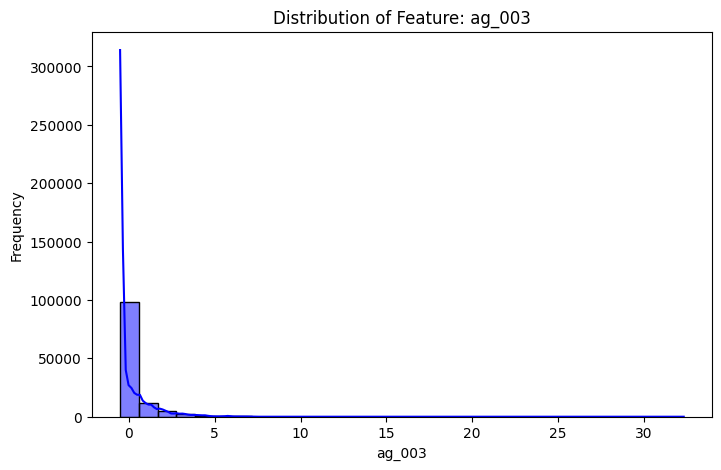

In [15]:
# Visualize Feature Distributions (Example: First 10 Features)
X_train_sample = pd.DataFrame(X_train, columns=X_train.columns if isinstance(X_train, pd.DataFrame) else train_data.columns[:-1])
feature_cols = X_train_sample.columns[:10]

for col in feature_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(X_train_sample[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of Feature: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation Matrix for Features

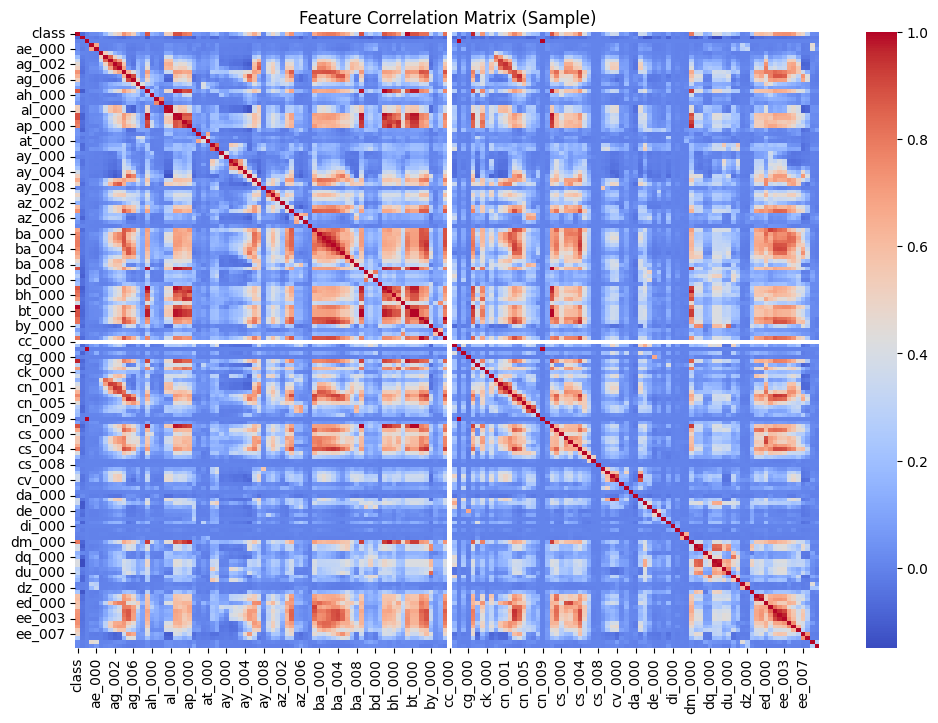

In [16]:

correlation_matrix = X_train_sample.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Feature Correlation Matrix (Sample)')
plt.show()


# Feature Scaling

In [17]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# PCA

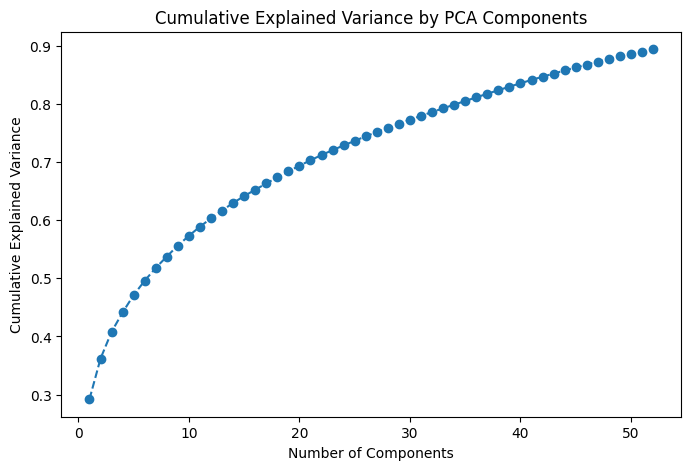

In [19]:
from sklearn.decomposition import PCA

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

# Dimensionality Reduction with PCA
pca = PCA(n_components=52, random_state=42)  # Reduce to 52 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize Explained Variance Ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, 53), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Decision tree

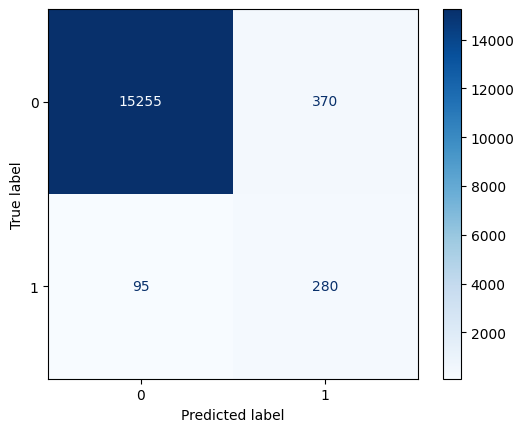

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     15625
           1       0.43      0.75      0.55       375

    accuracy                           0.97     16000
   macro avg       0.71      0.86      0.77     16000
weighted avg       0.98      0.97      0.97     16000

ROC-AUC Score: 0.8614933333333332


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
# Train the model
decision_tree.fit(X_train_pca, y_train)

# Evaluate the model on test data
y_pred_dt = decision_tree.predict(X_test_pca)
y_pred_proba_dt = decision_tree.predict_proba(X_test_pca)[:, 1]

cm = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')  # Use any color map
plt.show()

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))

# Cross-validation in decision tree

In [21]:

cv_scores = cross_val_score(decision_tree, X_train_pca, y_train, cv=5, scoring='roc_auc')
 
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC: {cv_scores.mean()}\n")



Cross-Validation ROC-AUC Scores: [0.98059262 0.98067736 0.98326171 0.98449071 0.98398169]
Mean ROC-AUC: 0.9826008186559907



# Accuracy Analysis in Decision tree 

# Logistic Regression

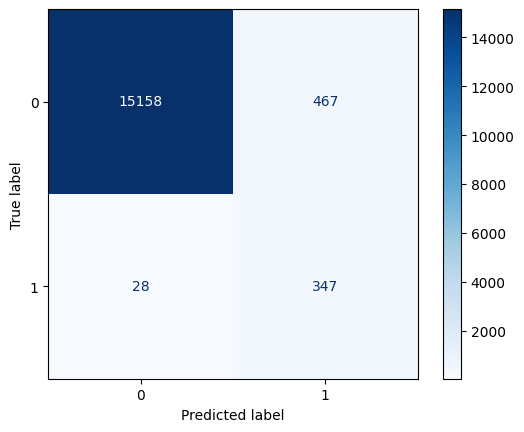

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.43      0.93      0.58       375

    accuracy                           0.97     16000
   macro avg       0.71      0.95      0.78     16000
weighted avg       0.98      0.97      0.97     16000

Logistic Regression ROC-AUC Score: 0.9879475200000001


In [22]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_model = LogisticRegression(C =0.001,penalty = 'l2')

# Train the model
lr_model.fit(X_train_pca, y_train)

# Evaluate the model on validation data
y_pred_lr = lr_model.predict(X_test_pca)
y_pred_proba_lr = lr_model.predict_proba(X_test_pca)[:, 1]

cm = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.show()

# Metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))

# Cross-validation for Logistic Regression Classifier

In [24]:

lr_cv_scores = cross_val_score(lr_model, X_train_pca, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression Cross-Validation ROC-AUC Scores: {lr_cv_scores}")
print(f"Mean ROC-AUC: {lr_cv_scores.mean()}\n")


Logistic Regression Cross-Validation ROC-AUC Scores: [0.97991031 0.98137578 0.97983161 0.98140359 0.9815538 ]
Mean ROC-AUC: 0.9808150207405326



# Random Forest Classifier

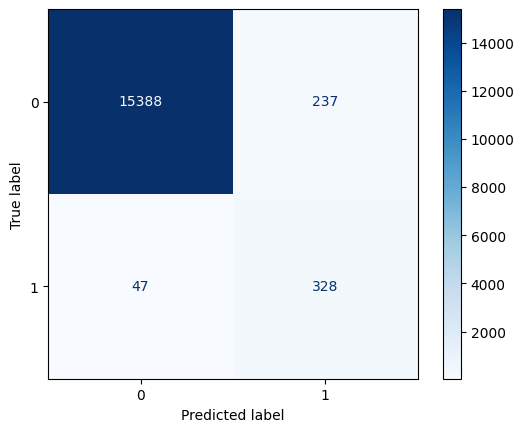

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.58      0.87      0.70       375

    accuracy                           0.98     16000
   macro avg       0.79      0.93      0.84     16000
weighted avg       0.99      0.98      0.98     16000

Random Forest ROC-AUC Score: 0.9902265173333333


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=25,max_features= 'log2',oob_score =True)


# Train the model
rf_model.fit(X_train_pca, y_train)

# Evaluate the model on test data
rf_y_pred_rf = rf_model.predict(X_test_pca)
rf_y_pred_proba_rf = rf_model.predict_proba(X_test_pca)[:, 1]

cm = confusion_matrix(y_test, rf_y_pred_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')  # Use any color map
plt.show()

# Metrics
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_y_pred_proba_rf))


# Cross-validation for Random Forest

In [26]:

rf_cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='roc_auc')
print(f"Random Forest Cross-Validation ROC-AUC Scores: {rf_cv_scores}")
print(f"Mean ROC-AUC: {rf_cv_scores.mean()}\n")

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Random Forest Cross-Validation ROC-AUC Scores: [0.99946327 0.99957762 0.99942622 0.99962098 0.99955822]
Mean ROC-AUC: 0.9995292624445904



/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
